# Hbb vertices  

In this notebook I'd like to investigate the vertices that are produced by the Hbb decay channel. I have implemented the secondary vertices (SV) and V0 in the script I would like to see if this behaves as expected.

In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
def load_data(file_name):
    file = uproot.open(file_name)
    tree = file['tree;1']
    data = tree.arrays(library="np")
    return data

In [3]:
path = "/afs/cern.ch/work/s/saaumill/public/final-fullsim-inputNN"
data = load_data(f"{path}/Hbb-inputNN-vertices.root")

In [4]:
data

{'event_number': array([  0,   1,   2, ..., 197, 198, 199], dtype=int32),
 'n_hit': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'n_part': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'jet_p': array([63.009758, 59.774   , 80.919304, ..., 42.638935, 87.25303 ,
        35.352734], dtype=float32),
 'jet_e': array([64.12837 , 60.604443, 81.24265 , ..., 43.550564, 89.50852 ,
        37.079247], dtype=float32),
 'jet_mass': array([11.92555  ,  9.998392 ,  7.2411733, ...,  8.864133 , 19.96711  ,
        11.182792 ], dtype=float32),
 'jet_nconst': array([28, 12, 19, ..., 15, 38, 20], dtype=int32),
 'jet_npfcand': array([28, 12, 19, ..., 15, 38, 20], dtype=int32),
 'jet_theta': array([0.87863094, 2.1130383 , 0.5733051 , ..., 1.6852678 , 1.4914706 ,
        1.496393  ], dtype=float32),
 'jet_phi': array([ 1.4161861, -1.0591359, -2.5264065, ...,  3.0441535,  0.2112966,
        -2.741174 ], dtype=float32),
 'recojet_isG': array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 'recojet_isU': array([0, 0, 0

In [5]:
data.keys()

dict_keys(['event_number', 'n_hit', 'n_part', 'jet_p', 'jet_e', 'jet_mass', 'jet_nconst', 'jet_npfcand', 'jet_theta', 'jet_phi', 'recojet_isG', 'recojet_isU', 'recojet_isD', 'recojet_isS', 'recojet_isC', 'recojet_isB', 'recojet_isTAU', 'pfcand_e', 'pfcand_p', 'pfcand_theta', 'pfcand_phi', 'pfcand_type', 'pfcand_charge', 'pfcand_isEl', 'pfcand_isMu', 'pfcand_isGamma', 'pfcand_isNeutralHad', 'pfcand_isChargedHad', 'jet_nmu', 'jet_nel', 'jet_ngamma', 'jet_nnhad', 'jet_nchad', 'pfcand_erel_log', 'pfcand_phirel', 'pfcand_thetarel', 'pfcand_dptdpt', 'pfcand_detadeta', 'pfcand_dphidphi', 'pfcand_dxydxy', 'pfcand_dzdz', 'pfcand_dxydz', 'pfcand_dphidxy', 'pfcand_dlambdadz', 'pfcand_dxyc', 'pfcand_dxyctgtheta', 'pfcand_phic', 'pfcand_phidz', 'pfcand_phictgtheta', 'pfcand_cdz', 'pfcand_cctgtheta', 'pfcand_dxy', 'pfcand_dz', 'pfcand_btagSip2dVal', 'pfcand_btagSip2dSig', 'pfcand_btagSip3dVal', 'pfcand_btagSip3dSig', 'pfcand_btagJetDistVal', 'pfcand_btagJetDistSig', 'pfcand_mtof', 'pfcand_dndx', 'pf

In [16]:
SV_id, counts = np.unique(np.concatenate(data["pfcand_SV_id"]), return_counts=True)
len(SV_id) # 380 SV in total

380

In [17]:
V0_id, counts = np.unique(np.concatenate(data["pfcand_V0_id"]), return_counts=True)
len(V0_id) # 85 SV in total

85

In [18]:
SV_x, counts = np.unique(np.concatenate(data["pfcand_SV_x"]), return_counts=True)
len(SV_x) # 380 SV in total

1784

In [32]:
def make_vertex_dic(type):
    """type = 'SV' or 'V0' """
    vertex_dic = {"x": [], "y": [], "z": [], "ids": [], "M": []}
    ids = np.unique(np.concatenate(data[f"pfcand_{type}_id"]))
    vertex_dic["ids"] = ids
    for id in ids:
        if id!=0:
            loc = np.where(np.concatenate(data[f"pfcand_{type}_id"]) == id)
            first_loc = loc[0][0]
            x = np.concatenate(data[f"pfcand_{type}_x"])[first_loc]
            y = np.concatenate(data[f"pfcand_{type}_y"])[first_loc]
            z = np.concatenate(data[f"pfcand_{type}_z"])[first_loc]
            M = np.concatenate(data[f"pfcand_{type}_M"])[first_loc]
            vertex_dic["x"].append(x)
            vertex_dic["y"].append(y)
            vertex_dic["z"].append(z)
            vertex_dic["M"].append(M)
    return vertex_dic

In [33]:
V0_dic = make_vertex_dic(type="V0")
SV_dic = make_vertex_dic(type="SV")

In [48]:
SV_dic.keys()

dict_keys(['x', 'y', 'z', 'ids', 'M'])

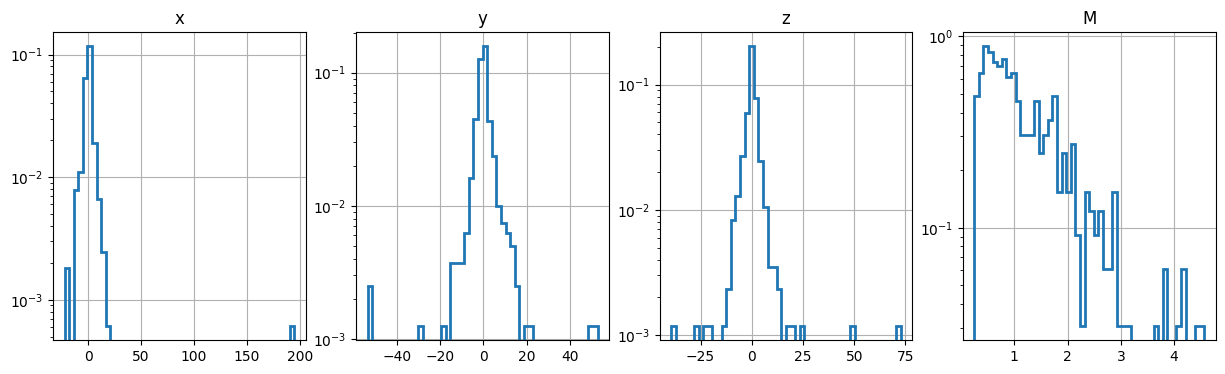

In [60]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
for i, (key, value) in enumerate(SV_dic.items()):
    if key == "ids":
        continue
    if key == "M":
        i = i-1 # bad fix but works haha
    ax[i].hist(value, bins=50, histtype='step', linewidth=2.0, density=True)
    ax[i].set_title(key)
    ax[i].grid()
    ax[i].set_yscale("log")

plt.show()


Mass spectrum: 
- K0  at 0.5 Gev?
- D mesons at 1.865 GeV?
- Lambda at 2.286 Gev?
- J/psi at 3.100 GeV?
- psi (2s) at 3.686 GeV?

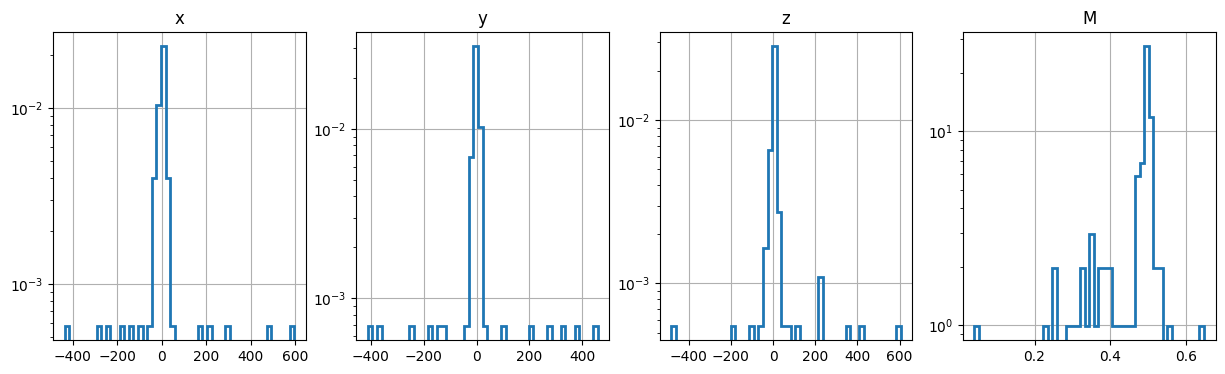

In [61]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
for i, (key, value) in enumerate(V0_dic.items()):
    if key == "ids":
        continue
    if key == "M":
        i = i-1 # bad fix but works haha
    ax[i].hist(value, bins=50, histtype='step', linewidth=2.0, density=True)
    ax[i].set_title(key)
    ax[i].grid()
    ax[i].set_yscale("log")

plt.show() # less statistics for V0

Mass peak could be K0 with 497 MeV/c $^2$